In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
options = {
    'edge_color': '#FFDEA2',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
}

In [4]:
def generate_graph_df(df, year_column='ANO_DESENVOLVIMENTO'):
    df_result = df[df[year_column] >= 2010]
    
    # Pega as patentes que aparecem mais de uma vez
    df_result = df_result[['inct', 'CODIGO_DO_REGISTRO_OU_PATENTE']].dropna().drop_duplicates()
    
    # Realiza o merge do dataframe com ele mesmo utilizando como chave
    # o código da patentes
    df_result = df_result.merge(df_result.rename(columns={"inct": 'inct_target'}), on='CODIGO_DO_REGISTRO_OU_PATENTE')
    df_result = df_result[(df_result['inct']!=df_result['inct_target'])]
    
    return df_result
    

## Patentes

In [4]:
df_patentes = pd.read_excel('../dados-processados/patentes.xlsx')

In [5]:
df_patentes.head()

,ID_LATTES,respondeu,inct,grupo_tematico,membro_status,SEQUENCIA_PRODUCAO,TITULO,ANO_DESENVOLVIMENTO,PAIS,HOME_PAGE,...,SETOR_DE_ATIVIDADE_1,SETOR_DE_ATIVIDADE_2,SETOR_DE_ATIVIDADE_3,DESCRICAO_INFORMACOES_ADICIONAIS,DESCRICAO_INFORMACOES_ADICIONAIS_INGLES,NOME_AUTORES,NOME_CITACAO_AUTORES,ORDEM_AUTORES,ID_AUTORES,AUTOR_NOME_COMPLETO
0,21199964477362,False,INCT de Catálise em Sistemas Moleculares e Nan...,Nanotecnologia,NaN,636,Nanopartículas superparamagnéticas (NPMs) de F...,2016,Brasil,NaN,...,Atividades de atenção à saúde humana,NaN,NaN,Nanopartículas superparamagnéticas (NPMs) de F...,NaN,"ZOTTIS, ALEXANDRE D´AGOSTINI; Luiciano R. S. L...","ZOTTIS, ALEXANDRE D´AGOSTINI; LARA, L. R. S.; ...",1; 10; 11; 2; 3; 4; 5; 6; 7; 8; 9,VAZIO; VAZIO; VAZIO; VAZIO; VAZIO; VAZIO; 5839...,Bruno Szpoganicz
1,21199964477362,False,INCT de Catálise em Sistemas Moleculares e Nan...,Nanotecnologia,NaN,637,NANOPARTÍCULAS SUPERPARAMAGNÉTICAS DE FE3O4 RE...,2016,Brasil,NaN,...,Atividades de atenção à saúde humana,NaN,NaN,NANOPARTÍCULAS SUPERPARAMAGNÉTICAS DE FE3O4 RE...,NaN,"ZOTTIS, ALEXANDRE D´AGOSTINI; Luiciano R. S. L...","ZOTTIS, ALEXANDRE D´AGOSTINI; LARA, L. R. S.; ...",1; 10; 11; 2; 3; 4; 5; 6; 7; 8; 9; 1; 2; 3; 4;...,VAZIO; VAZIO; VAZIO; VAZIO; VAZIO; VAZIO; 5839...,Bruno Szpoganicz
2,22988322449627,True,INCT de Ciencias dos Materiais em Nanotecnologia,Nanotecnologia,NaN,670,PROCESSO PARA TRATAMENTO DE ÁGUAS CONTAMINADAS...,2010,Brasil,NaN,...,Extração de Petróleo e Gás Natural,NaN,NaN,Patent No.: BR200400472-A Date of publication:...,Patent No.: BR200400472-A Date of publication:...,Gaspar Gonzalez Maldonado; Marcus Antonio de F...,"MALDONADO, Gaspar Gonzalez; MELO, Marcus Anton...",1; 2; 3; 4; 1; 2; 3; 4; 5; 6; 1; 2; 3; 4; 1; 2...,VAZIO; VAZIO; 5840621182000517; 33188717161115...,Antonio Eduardo Martinelli
3,22988322449627,True,INCT de Ciencias dos Materiais em Nanotecnologia,Nanotecnologia,NaN,753,FORMULAÇÕES DE MASSA CERÂMICA PARA REVESTIMENT...,2011,Brasil,NaN,...,Metalurgia,NaN,NaN,FERRAMENTA E MÉTODO PARA AUMENTAR A PRODUÇÃO E...,NaN,Gaspar Gonzalez Maldonado; Marcus Antonio de F...,"MALDONADO, Gaspar Gonzalez; MELO, Marcus Anton...",1; 2; 3; 4; 1; 2; 3; 4; 5; 6; 1; 2; 3; 4; 1; 2...,VAZIO; VAZIO; 5840621182000517; 33188717161115...,Antonio Eduardo Martinelli
4,22988322449627,True,INCT de Ciencias dos Materiais em Nanotecnologia,Nanotecnologia,NaN,624,PASTA CIMENTANTE GEOPOLIMERIZADA E MÉTODO DE P...,2006,Brasil,http://pesquisa.inpi.gov.br/MarcaPatente/servl...,...,Extração de Petróleo e Serviços Correlatos,NaN,NaN,A patente de invenção diz respeito à adição de...,NaN,Gaspar Gonzalez Maldonado; Marcus Antonio de F...,"MALDONADO, Gaspar Gonzalez; MELO, Marcus Anton...",1; 2; 3; 4; 1; 2; 3; 4; 5; 6; 1; 2; 3; 4; 1; 2...,VAZIO; VAZIO; 5840621182000517; 33188717161115...,Antonio Eduardo Martinelli


In [6]:
df_patentes.shape

(5433, 47)

In [7]:
df_patentes = generate_graph_df(df_patentes)
df_patentes.head()

,inct,CODIGO_DO_REGISTRO_OU_PATENTE,inct_target
18,INCT de Medicina Molecular,BR1020150103522,INCT de Nanotecnologia para Marcadores Integrados
19,INCT de Medicina Molecular,BR1020150103522,INCT de Nanodispositivos Semicondutores
20,INCT de Nanotecnologia para Marcadores Integrados,BR1020150103522,INCT de Medicina Molecular
22,INCT de Nanotecnologia para Marcadores Integrados,BR1020150103522,INCT de Nanodispositivos Semicondutores
23,INCT de Nanodispositivos Semicondutores,BR1020150103522,INCT de Medicina Molecular


In [8]:
df_patentes.shape

(220, 3)

In [9]:
G = nx.from_pandas_edgelist(df=df_patentes, source='inct', target='inct_target', edge_attr='CODIGO_DO_REGISTRO_OU_PATENTE')

/home/matheus/.local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


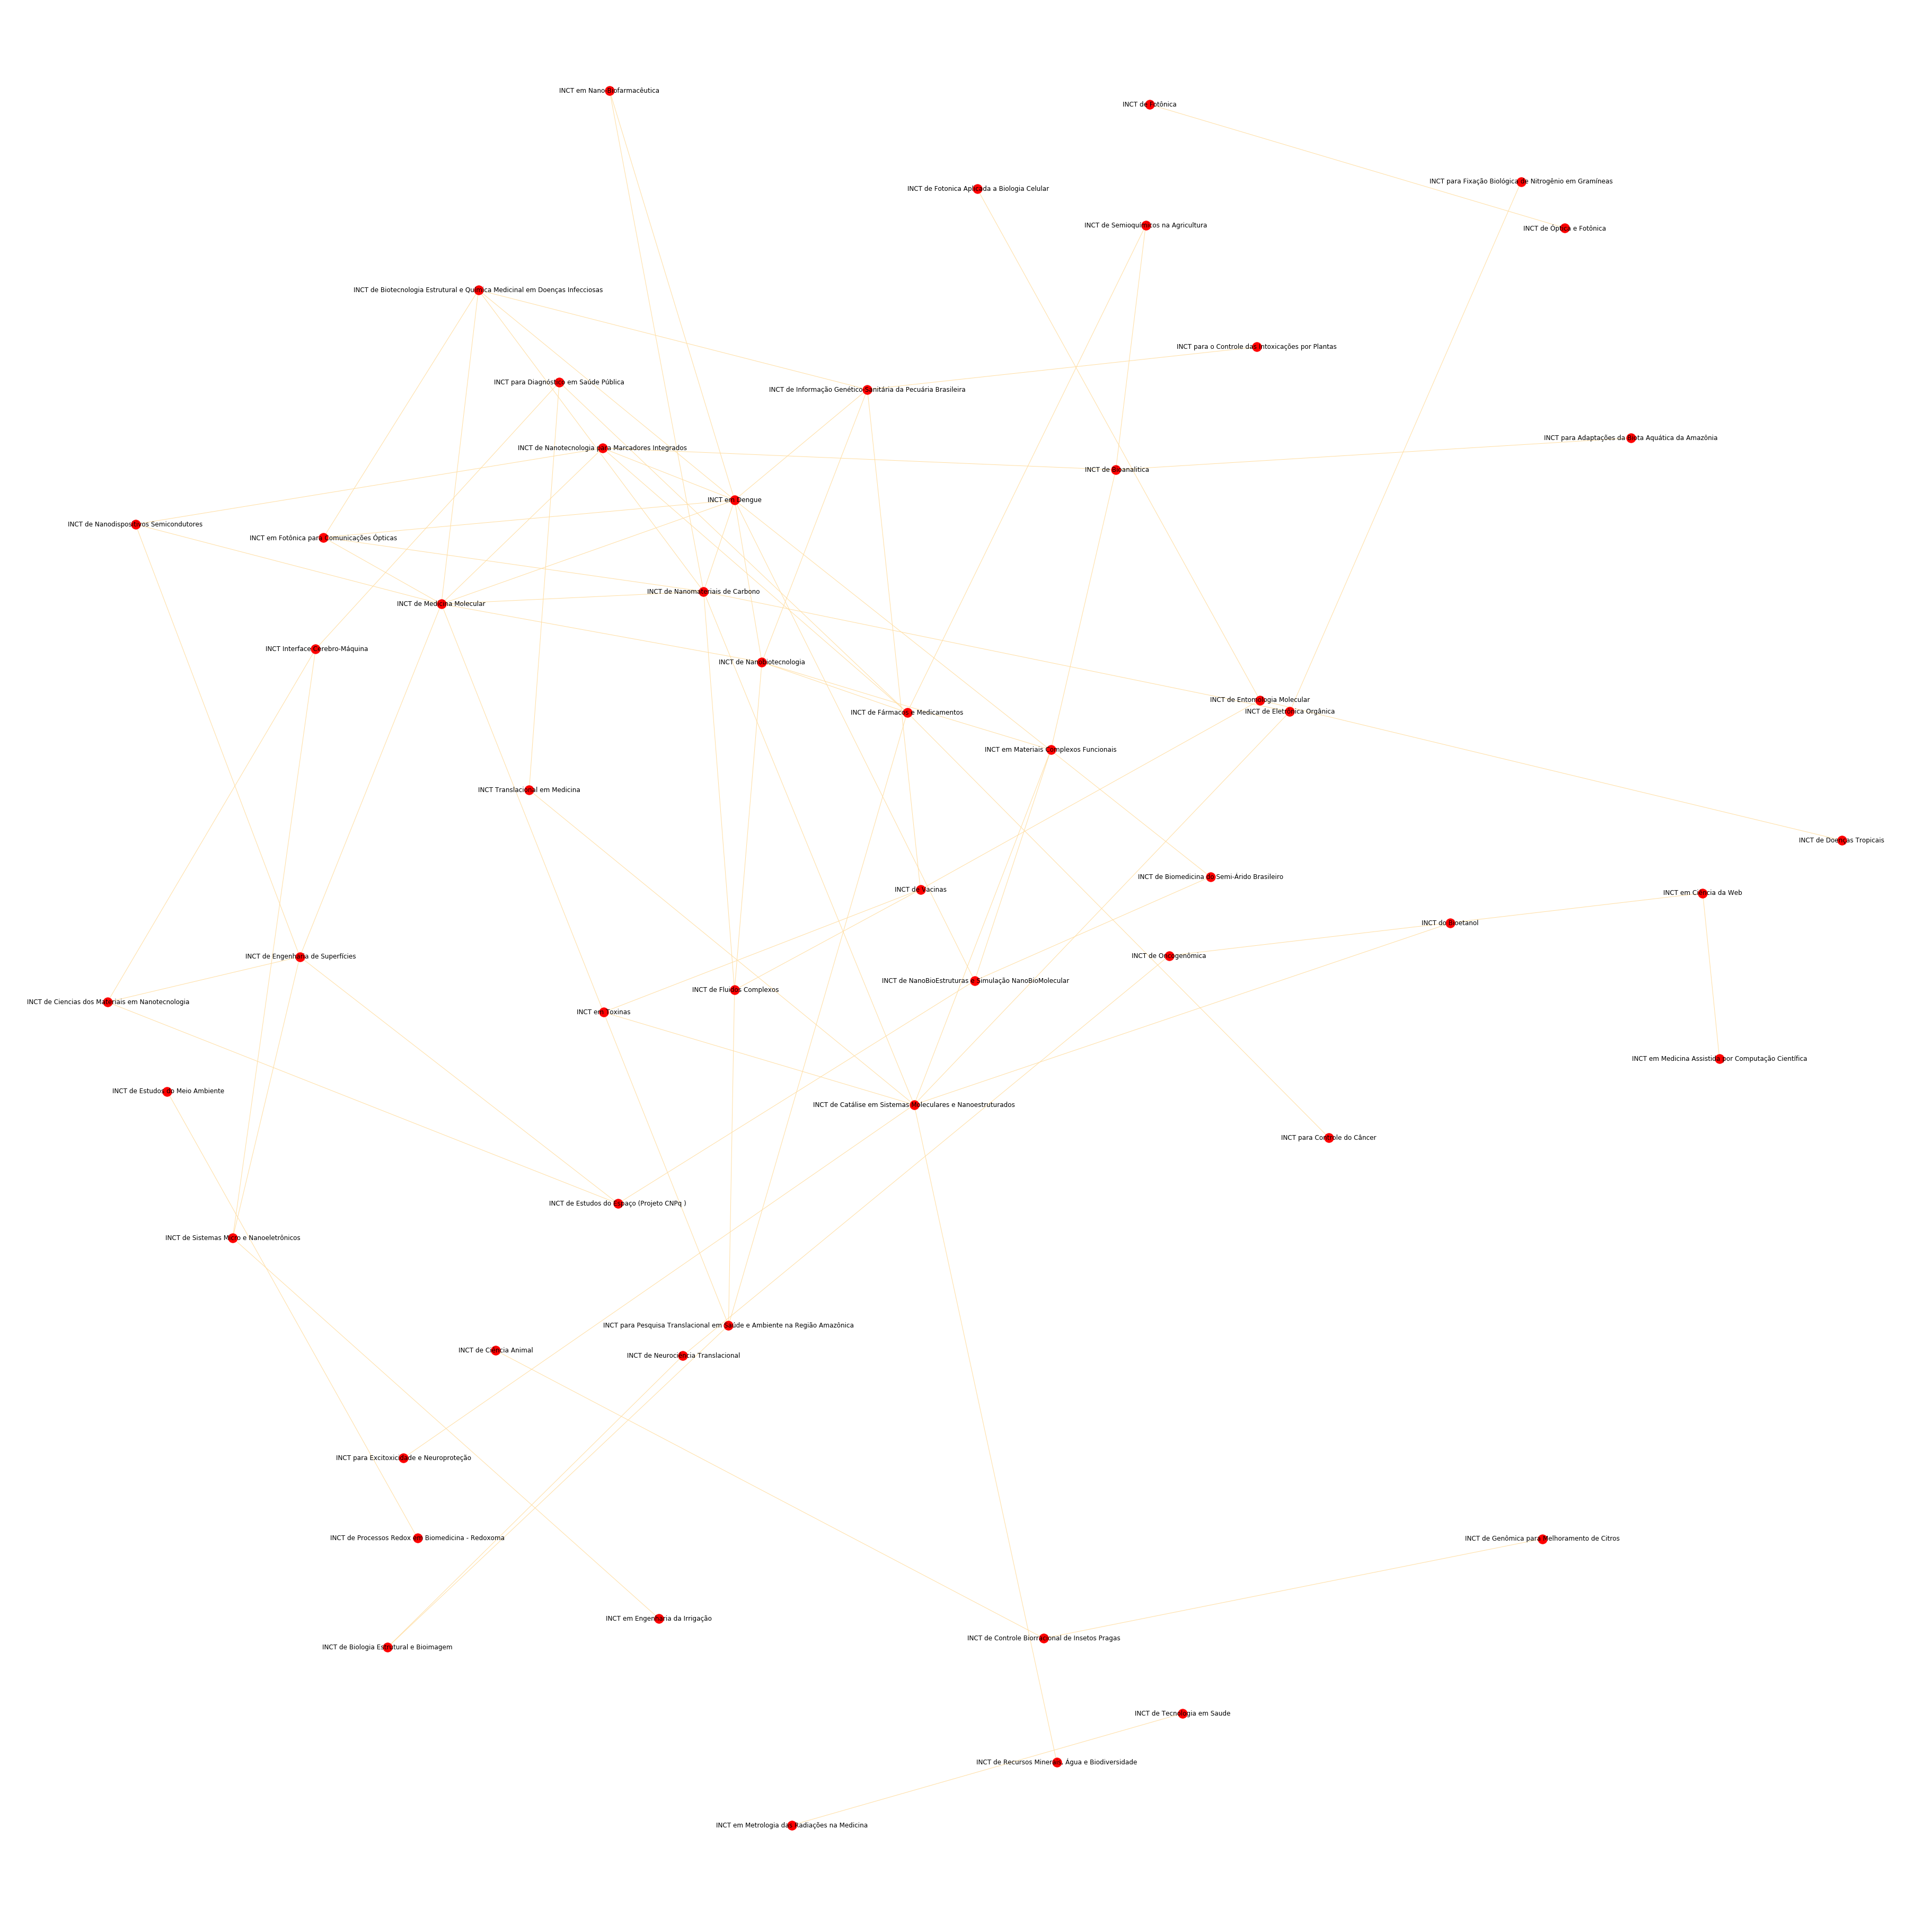

In [10]:
plt.figure(figsize=(50,50))
nx.draw(G, pos=nx.spring_layout(G, k=0.6, iterations=50, scale=10), **options)
plt.savefig('./graph4.png')
plt.show()

## Software

In [11]:
df_software = pd.read_excel('../dados-processados/software.xlsx')

In [12]:
df_software.head()

,ID_LATTES,respondeu,inct,grupo_tematico,membro_status,SEQUENCIA_PRODUCAO,NATUREZA,TITULO_DO_SOFTWARE,ANO,PAIS,...,DESCRICAO_INFORMACOES_ADICIONAIS_INGLES,PALAVRA_CHAVE_1,PALAVRA_CHAVE_2,PALAVRA_CHAVE_3,PALAVRA_CHAVE_4,PALAVRA_CHAVE_5,PALAVRA_CHAVE_6,SETOR_DE_ATIVIDADE_1,SETOR_DE_ATIVIDADE_2,SETOR_DE_ATIVIDADE_3
0,12168139768170,True,INCT para Estudos Tectônicos,Exatas e Naturais,NaN,49,COMPUTACIONAL,Inversão conjunta de funções de receptor e vel...,2000.0,Espanha,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12168139768170,True,INCT para Estudos Tectônicos,Exatas e Naturais,NaN,50,COMPUTACIONAL,Empilhamento de Zhu & Kanamori para funções de...,2000.0,Estados Unidos,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12168139768170,True,INCT para Estudos Tectônicos,Exatas e Naturais,NaN,52,COMPUTACIONAL,Análise de amplitudes de funções de receptor (...,2005.0,Estados Unidos,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12168139768170,True,INCT para Estudos Tectônicos,Exatas e Naturais,NaN,51,COMPUTACIONAL,Inversão tensor momento com amplitudes espectr...,2008.0,Estados Unidos,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16773086984120,True,"INCT sobre Comportamento, Cognição e Ensino",Humanas e Sociais,NaN,72,COMPUTACIONAL,Compound,2003.0,Brasil,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_software.shape

(4340, 53)

In [14]:
df_software = generate_graph_df(df_software, year_column='ANO')
df_software.head()

,inct,CODIGO_DO_REGISTRO_OU_PATENTE,inct_target
63,INCT de Sistemas Embarcados Críticos,BR5120150002171,"INCT sobre Comportamento, Cognição e Ensino"
64,"INCT sobre Comportamento, Cognição e Ensino",BR5120150002171,INCT de Sistemas Embarcados Críticos
224,INCT de Sistemas Micro e Nanoeletrônicos,119950,INCT de Sistemas Embarcados Críticos
225,INCT de Sistemas Embarcados Críticos,119950,INCT de Sistemas Micro e Nanoeletrônicos


In [15]:
df_software.shape

(4, 3)

In [16]:
Gsoftware = nx.from_pandas_edgelist(df=df_software, source='inct', target='inct_target', edge_attr='CODIGO_DO_REGISTRO_OU_PATENTE')

/home/matheus/.local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


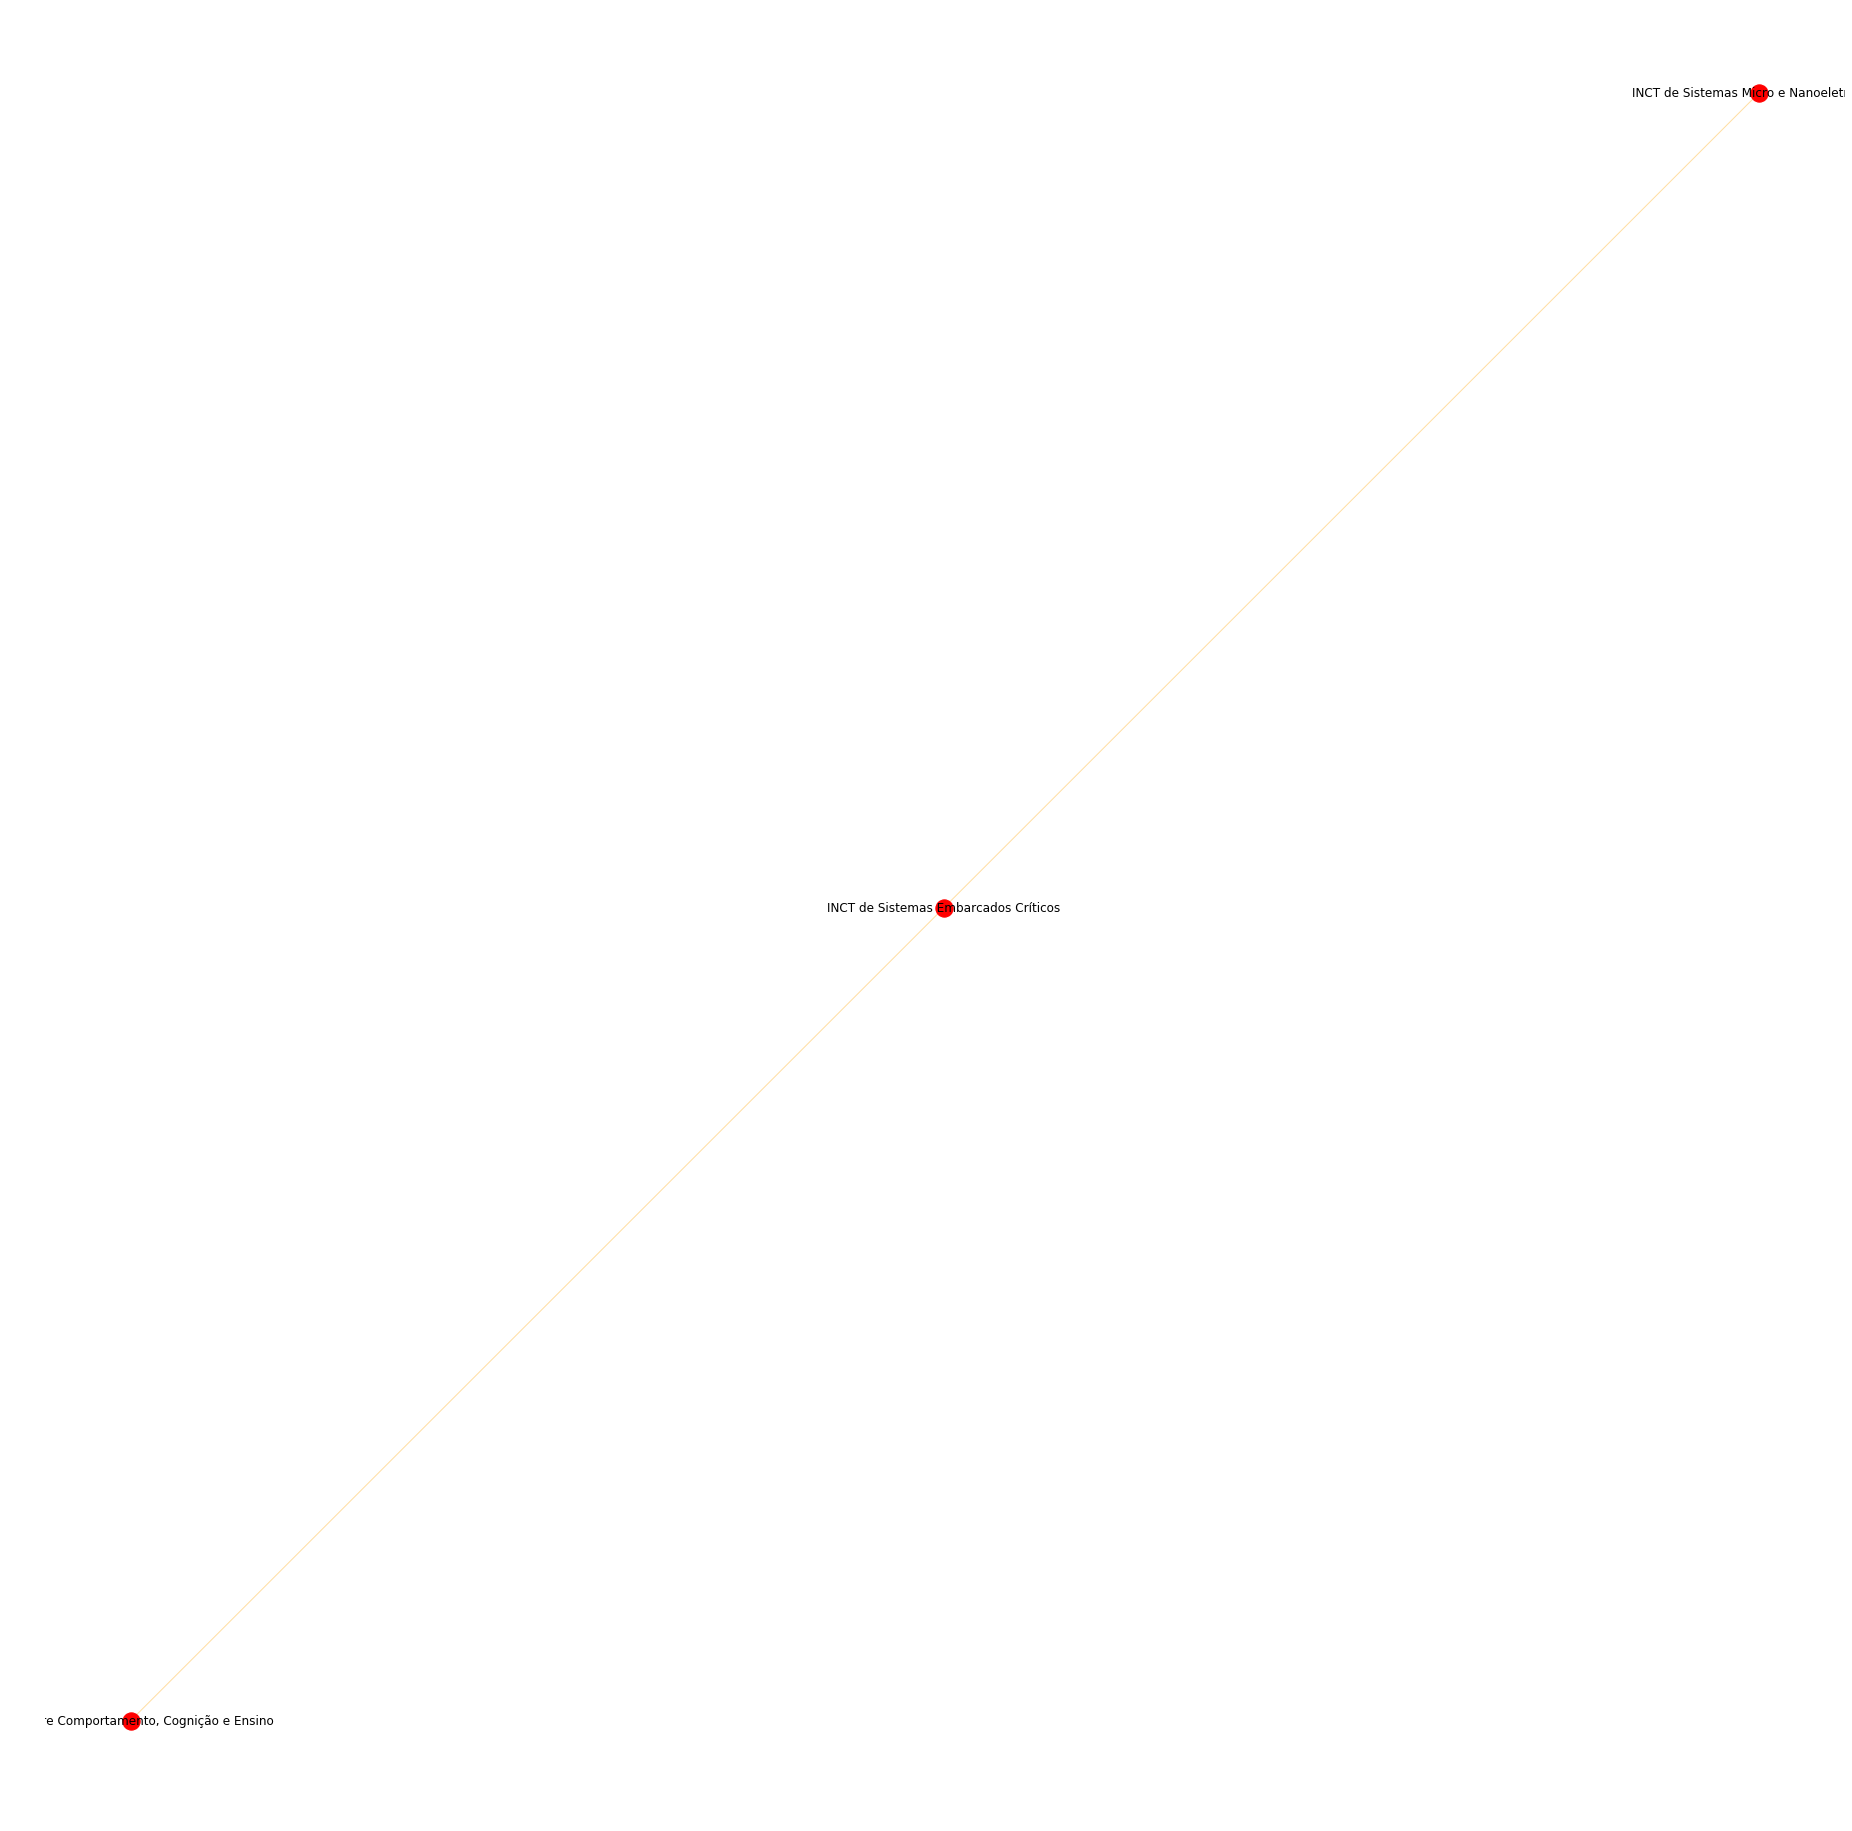

In [17]:
plt.figure(figsize=(25,25))
nx.draw(Gsoftware, **options)
plt.savefig('./graph_software.png')
plt.show()

## Todos os tipos de patentes

In [26]:
df_patentes = pd.read_excel('../dados-processados/patentes.xlsx')
df_software = pd.read_excel('../dados-processados/software.xlsx')
df_desenho = pd.read_excel('../dados-processados/desenhos.xlsx')
df_cultivar_registrada = pd.read_excel('../dados-processados/cultivar-registrada.xlsx')
df_cultivar_protegida = pd.read_excel('../dados-processados/cultivar-protegida.xlsx')
df_marca = pd.read_excel('../dados-processados/marcas.xlsx')
df_topografia = pd.read_excel('../dados-processados/topografia.xlsx')

In [27]:
df_patentes['tipo_prod'] = 'patentes'

In [6]:
df_software.rename(columns={'ANO': 'ANO_DESENVOLVIMENTO'}, inplace=True)

In [7]:
frames = [df_patentes, df_software, df_desenho, df_cultivar_protegida, df_cultivar_registrada, df_marca, df_topografia]

In [8]:
df_result = pd.concat(frames)

/home/matheus/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [9]:
df_result.shape

(10232, 60)

In [10]:
df_graph = generate_graph_df(df_result)

In [11]:
df_graph.head()

,inct,CODIGO_DO_REGISTRO_OU_PATENTE,inct_target
18,INCT de Medicina Molecular,BR1020150103522,INCT de Nanotecnologia para Marcadores Integrados
19,INCT de Medicina Molecular,BR1020150103522,INCT de Nanodispositivos Semicondutores
20,INCT de Nanotecnologia para Marcadores Integrados,BR1020150103522,INCT de Medicina Molecular
22,INCT de Nanotecnologia para Marcadores Integrados,BR1020150103522,INCT de Nanodispositivos Semicondutores
23,INCT de Nanodispositivos Semicondutores,BR1020150103522,INCT de Medicina Molecular


In [12]:
df_graph.shape

(226, 3)

In [13]:
Gresult = nx.from_pandas_edgelist(df=df_graph, source='inct', target='inct_target', edge_attr='CODIGO_DO_REGISTRO_OU_PATENTE')

In [14]:
from networkx import gexf

In [15]:
gexf.write_gexf(Gresult, './prod-tecnolgicas.gexf')

/home/matheus/.local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


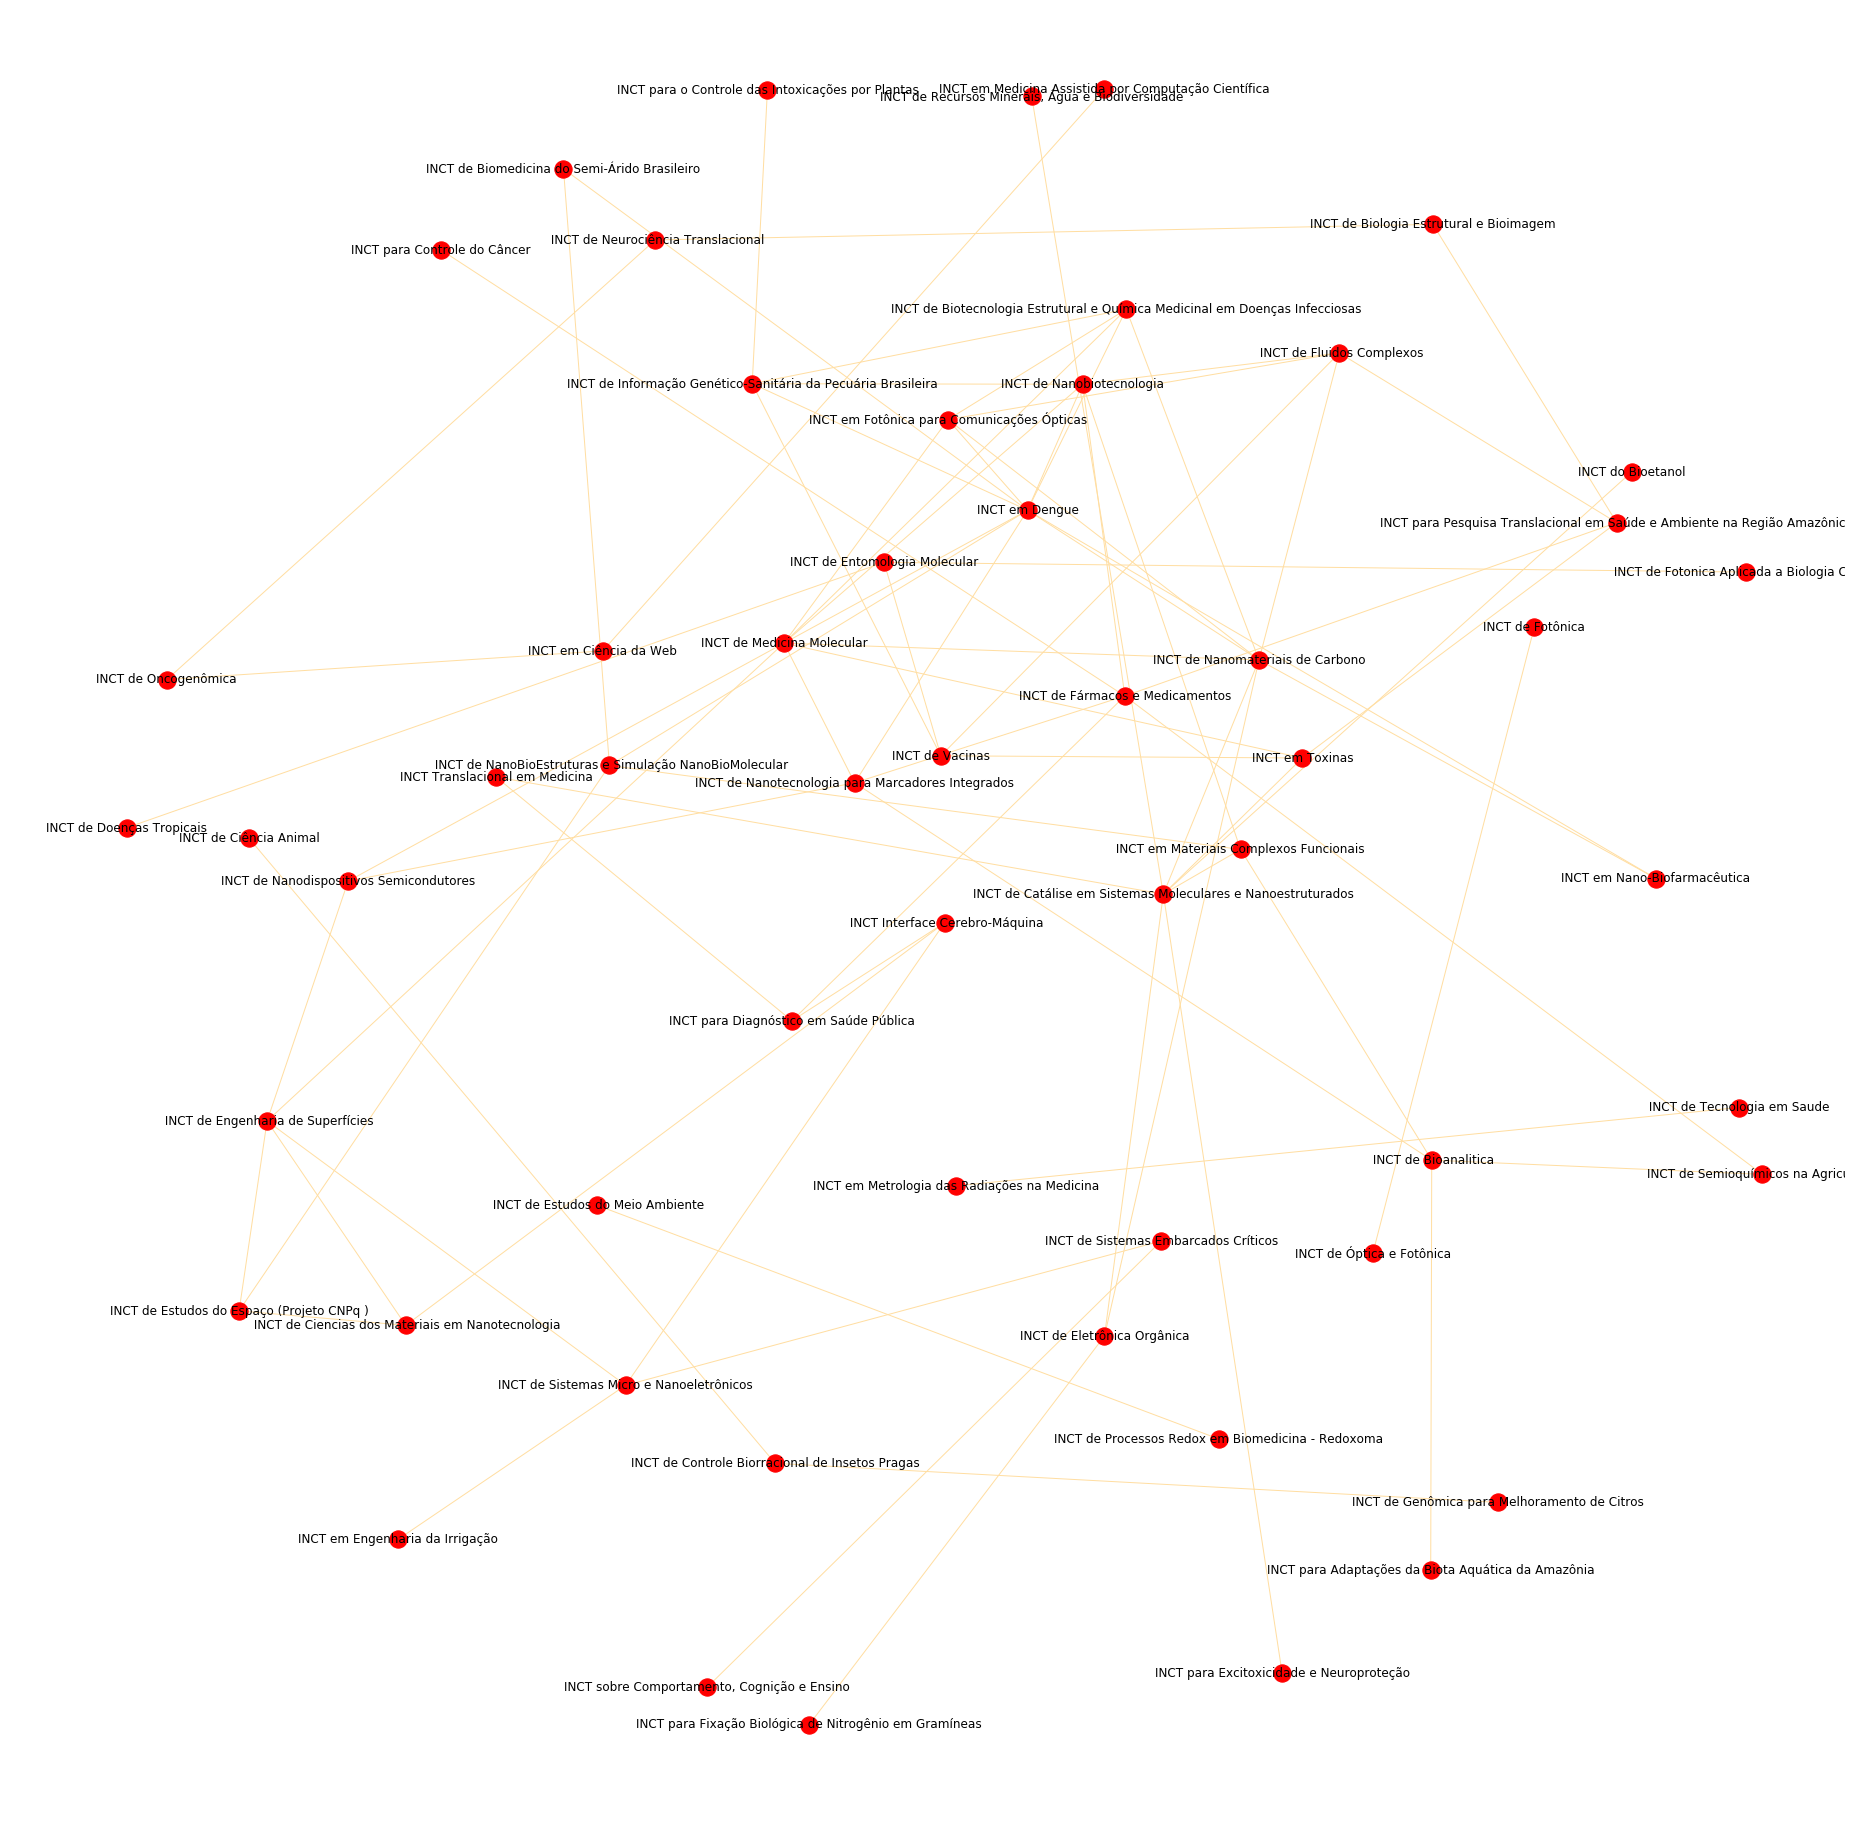

In [27]:
plt.figure(figsize=(25,25))
nx.draw(Gresult, pos=nx.spring_layout(Gresult, k=0.8, iterations=50, scale=10), **options)
plt.savefig('./graph_all.png')
plt.show()